In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
import ipywidgets
import jupyterlab_widgets
from tqdm.auto import tqdm
# Ignore Warnings
import warnings
import time
warnings.filterwarnings("ignore")

# Generate data paths with labels
def define_paths(data_dir):
    filepaths = []
    labels = []

    folds = os.listdir(data_dir)
    for fold in folds:
        foldpath = os.path.join(data_dir, fold)
        filelist = os.listdir(foldpath)
        for file in filelist:
            fpath = os.path.join(foldpath, file)
            filepaths.append(fpath)
            if fold == '1':
                labels.append('meningioma')
            elif fold == '2':
                labels.append('glioma')
            elif fold == '3':
                labels.append('pituitary tumor')

    return filepaths, labels

# Concatenate data paths with labels into one dataframe ( to later be fitted into the model )
def define_df(files, classes):
    Fseries = pd.Series(files, name= 'filepaths')
    Lseries = pd.Series(classes, name='labels')
    return pd.concat([Fseries, Lseries], axis= 1)


# Split dataframe to train, valid, and test
def create_df(data_dir):
    # train dataframe
    files, classes = define_paths(data_dir)
    df = define_df(files, classes)
    strat = df['labels']
    train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123, stratify= strat)

    # valid and test dataframe
    strat = dummy_df['labels']
    valid_df, test_df = train_test_split(dummy_df,  train_size= 0.5, shuffle= True, random_state= 123, stratify= strat)

    return train_df, valid_df, test_df

In [ ]:
data_dir = '/content/drive/MyDrive/Brain tumour'

try:
    # Get splitted data
    train_df, valid_df, test_df = create_df(data_dir)
    display(train_df,valid_df,test_df)
except:
    print('Invalid Input')

,filepaths,labels
1,/content/drive/MyDrive/Brain tumour/3/1005.png,pituitary tumor
2155,/content/drive/MyDrive/Brain tumour/2/559.png,glioma
3015,/content/drive/MyDrive/Brain tumour/2/1358.png,glioma
3045,/content/drive/MyDrive/Brain tumour/2/1845.png,glioma
1294,/content/drive/MyDrive/Brain tumour/1/2703.png,meningioma
...,...,...
99,/content/drive/MyDrive/Brain tumour/3/1425.png,pituitary tumor
1547,/content/drive/MyDrive/Brain tumour/1/2972.png,meningioma
2088,/content/drive/MyDrive/Brain tumour/2/484.png,glioma
774,/content/drive/MyDrive/Brain tumour/3/2253.png,pituitary tumor


,filepaths,labels
1514,/content/drive/MyDrive/Brain tumour/1/2980.png,meningioma
332,/content/drive/MyDrive/Brain tumour/3/1646.png,pituitary tumor
2126,/content/drive/MyDrive/Brain tumour/2/464.png,glioma
2474,/content/drive/MyDrive/Brain tumour/2/763.png,glioma
632,/content/drive/MyDrive/Brain tumour/3/2122.png,pituitary tumor
...,...,...
347,/content/drive/MyDrive/Brain tumour/3/1652.png,pituitary tumor
563,/content/drive/MyDrive/Brain tumour/3/2067.png,pituitary tumor
1999,/content/drive/MyDrive/Brain tumour/2/329.png,glioma
130,/content/drive/MyDrive/Brain tumour/3/1388.png,pituitary tumor


,filepaths,labels
1978,/content/drive/MyDrive/Brain tumour/2/327.png,glioma
1355,/content/drive/MyDrive/Brain tumour/1/2673.png,meningioma
2539,/content/drive/MyDrive/Brain tumour/2/833.png,glioma
2389,/content/drive/MyDrive/Brain tumour/2/744.png,glioma
143,/content/drive/MyDrive/Brain tumour/3/1404.png,pituitary tumor
...,...,...
522,/content/drive/MyDrive/Brain tumour/3/1753.png,pituitary tumor
520,/content/drive/MyDrive/Brain tumour/3/1761.png,pituitary tumor
2428,/content/drive/MyDrive/Brain tumour/2/732.png,glioma
139,/content/drive/MyDrive/Brain tumour/3/1421.png,pituitary tumor


In [ ]:
!pip install opencv-python


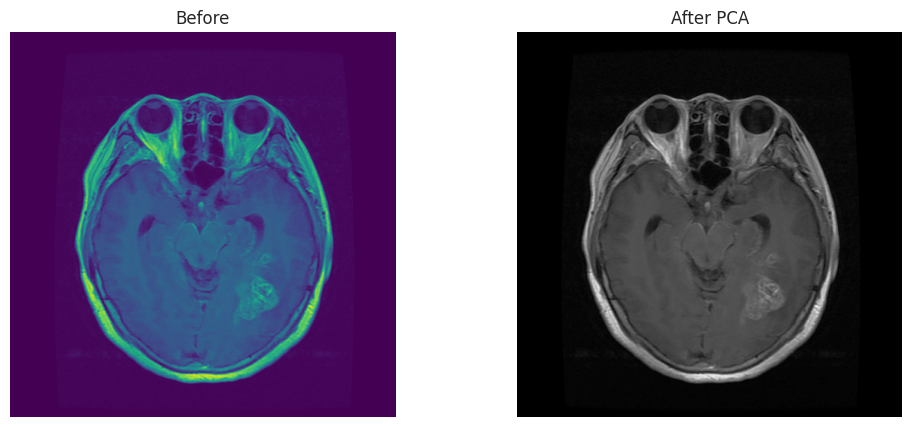

Original Image Size: 229.759 KB
Compressed Image Size: 80.016 KB


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import cv2
import numpy as np


image = cv2.imread('/content/drive/MyDrive/Brain tumour/2/2749.png')
image_rgb = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply PCA
pca = PCA()
transformed_image = pca.inverse_transform(pca.fit_transform(image_gray.reshape(-1, 1)))

# Reshape the transformed image back to the original shape
transformed_image_gray = transformed_image.reshape(image_gray.shape)
clf = KMeans(n_clusters=3, n_init='auto')
clf.fit(transformed_image)
pixels_seg0 = clf.cluster_centers_[clf.labels_]
pixels_seg = np.clip(pixels_seg0, 0, 255)
image_seg = pixels_seg.reshape(image_gray.shape)

fig, axarr = plt.subplots(1, 2, figsize=(12, 5))
axarr[0].imshow(image_rgb)
axarr[0].set_title(f'Before')
axarr[1].imshow(transformed_image_gray, cmap = 'gray')
axarr[1].set_title(f'After PCA')
# Turn off the axis labels
for ax in axarr:
    ax.axis('off')

# Show the subplots
plt.show()

cv2.imwrite('original_image.png', image_rgb)
cv2.imwrite('transformed_image.png', transformed_image_gray)

def get_size(file_path, unit='bytes'):
    file_size = os.path.getsize(file_path)
    exponents_map = {'bytes': 0, 'kb': 1, 'mb': 2, 'gb': 3}
    if unit not in exponents_map:
        raise ValueError("Must select from \
        ['bytes', 'kb', 'mb', 'gb']")
    else:
        size = file_size / 1024 ** exponents_map[unit]
        return round(size, 3)

original_size = get_size('original_image.png', 'kb')
transformed_size = get_size('transformed_image.png', 'kb')

print(f"Original Image Size: {original_size} KB")
print(f"Compressed Image Size: {transformed_size} KB")

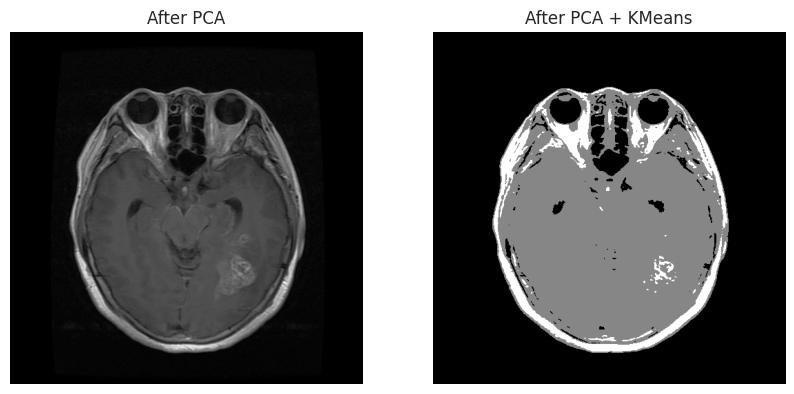

PCA Image Size: 80.016 KB
Segmented (K-Means) Image Size: 9.922 KB


In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(10, 5))
axarr[0].imshow(transformed_image_gray, cmap = 'gray')
axarr[0].set_title(f'After PCA')
axarr[1].imshow(image_seg, cmap = 'gray')
axarr[1].set_title(f'After PCA + KMeans')
# Turn off the axis labels
for ax in axarr:
    ax.axis('off')

# Show the subplots
plt.show()

cv2.imwrite('original_image.png', transformed_image_gray)
cv2.imwrite('transformed_image.png', image_seg)

original_size = get_size('original_image.png', 'kb')
transformed_size = get_size('transformed_image.png', 'kb')

print(f"PCA Image Size: {original_size} KB")
print(f"Segmented (K-Means) Image Size: {transformed_size} KB")

In [ ]:
class BrainTumorCNN(nn.Module):
    def __init__(self):
        super(BrainTumorCNN, self).__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Linear(64 * 8 * 8, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 3)  # 3 classes: glioma, meningioma, pituitary tumor
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Resize images to a consistent size
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.,), (1.,))  # Normalize image tensors
])

# Load the dataset
dataset = ImageFolder("/content/drive/MyDrive/Brain tumour", transform=transform)
display(dataset)

Dataset ImageFolder
    Number of datapoints: 3064
    Root location: /content/drive/MyDrive/Brain tumour
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.0,), std=(1.0,))
           )

In [ ]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

# Create an instance of the CNN model
model = BrainTumorCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30

for epoch in range(num_epochs):
    train_loss = 0.0
    val_loss = 0.0
    correct = 0.0
    # Training
    model.train()
    loop = tqdm(enumerate(train_loader), total = len(train_loader), bar_format=f"Epoch [{epoch+1}".ljust(9) + f"/ {num_epochs}]\t" + '{bar}{r_bar}')
    for batch_idx, (images, labels) in loop:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Progress bar version kontrimnon
        loop.set_postfix(loss = loss.item())
        # Update train_loss
        train_loss += loss.item() * images.size(0)

    # Validation
    model.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(train_dataset)
    val_loss = val_loss / len(val_dataset)
    accuracy = correct / len(val_dataset)
    # Print the loss and the accuracy of kontrimnon
    print(f"Train Loss (final): {train_loss:.4f} | Val Loss: {val_loss:.4f} | Accuracy: {accuracy * 100:.4f}%")

Epoch [1 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.8232 | Val Loss: 0.6096 | Accuracy: 71.2887%


Epoch [2 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.5640 | Val Loss: 0.4316 | Accuracy: 81.7292%


Epoch [3 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.4807 | Val Loss: 0.4303 | Accuracy: 80.0979%


Epoch [4 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.4319 | Val Loss: 0.3203 | Accuracy: 86.9494%


Epoch [5 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3662 | Val Loss: 0.3362 | Accuracy: 86.2969%


Epoch [6 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.3317 | Val Loss: 0.2459 | Accuracy: 89.8858%


Epoch [7 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.2990 | Val Loss: 0.2734 | Accuracy: 89.3964%


Epoch [8 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.2467 | Val Loss: 0.2196 | Accuracy: 90.2121%


Epoch [9 / 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.2268 | Val Loss: 0.1954 | Accuracy: 93.3116%


Epoch [10/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1776 | Val Loss: 0.1923 | Accuracy: 93.9641%


Epoch [11/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1562 | Val Loss: 0.1983 | Accuracy: 92.1697%


Epoch [12/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1275 | Val Loss: 0.1853 | Accuracy: 92.6591%


Epoch [13/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1028 | Val Loss: 0.1560 | Accuracy: 94.6166%


Epoch [14/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0786 | Val Loss: 0.1610 | Accuracy: 94.9429%


Epoch [15/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.1043 | Val Loss: 0.1753 | Accuracy: 93.9641%


Epoch [16/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0657 | Val Loss: 0.1896 | Accuracy: 94.7798%


Epoch [17/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0546 | Val Loss: 0.1800 | Accuracy: 95.5954%


Epoch [18/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0526 | Val Loss: 0.1434 | Accuracy: 95.9217%


Epoch [19/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0391 | Val Loss: 0.1480 | Accuracy: 96.0848%


Epoch [20/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0267 | Val Loss: 0.1645 | Accuracy: 95.5954%


Epoch [21/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0276 | Val Loss: 0.1533 | Accuracy: 95.1060%


Epoch [22/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0347 | Val Loss: 0.1683 | Accuracy: 95.4323%


Epoch [23/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0298 | Val Loss: 0.1379 | Accuracy: 96.7374%


Epoch [24/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0267 | Val Loss: 0.1758 | Accuracy: 94.2904%


Epoch [25/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0225 | Val Loss: 0.1932 | Accuracy: 95.5954%


Epoch [26/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0121 | Val Loss: 0.2743 | Accuracy: 92.9853%


Epoch [27/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0189 | Val Loss: 0.2059 | Accuracy: 96.2480%


Epoch [28/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0054 | Val Loss: 0.1495 | Accuracy: 96.7374%


Epoch [29/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0018 | Val Loss: 0.1691 | Accuracy: 96.7374%


Epoch [30/ 30]	          | 0/77 [00:00<?, ?it/s]

Train Loss (final): 0.0010 | Val Loss: 0.1749 | Accuracy: 96.5742%


In [ ]:
print(f">> Accuracy: {accuracy*100}%")

>> Accuracy: 96.5742251223491%


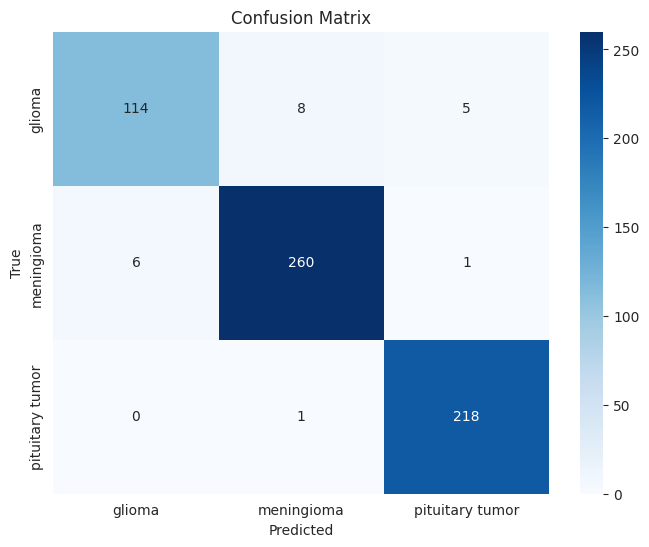

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluation loop
model.eval()
predictions = []
true_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        predictions.extend(predicted.tolist())
        true_labels.extend(labels.tolist())

# Create confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Define class labels
class_labels = ['glioma', 'meningioma', 'pituitary tumor']

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()